In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading Data

In [2]:
df = pd.read_csv('driver-data.csv')
df.head(2)

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25


In [3]:
df.drop(['id'],axis = 1, inplace=True)
df.head(2)

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25


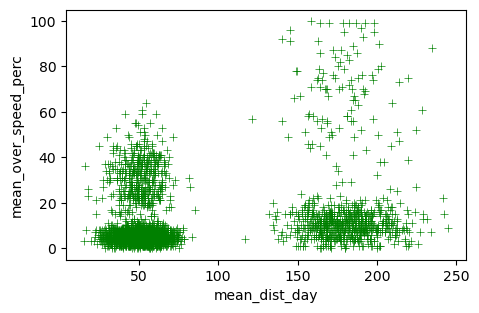

In [4]:
fig = plt.figure(dpi = 100,figsize=(4,2.5))
ax = fig.add_axes([1,1,1,1])

sns.scatterplot(x = 'mean_dist_day',
               y = 'mean_over_speed_perc',
               data = df,color = 'g',marker = '+',ax=ax);

ax.set(xlabel = 'mean_dist_day',
      ylabel = 'mean_over_speed_perc');

#### Elbow Method to find optimal number of clusters

In [5]:
from sklearn.cluster import KMeans
distortion = {}
for k in range(1,10):
    model = KMeans(n_clusters=k).fit(df)
    distortion[k] = model.inertia_

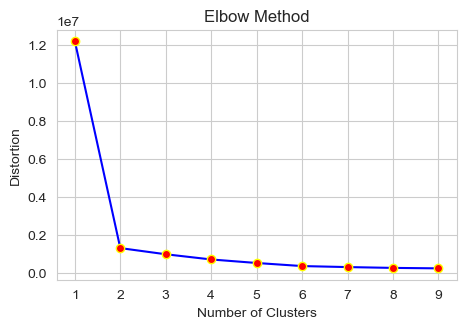

In [6]:
sns.set_style('whitegrid')
fig = plt.figure(dpi = 100, figsize=(4,2.5))
ax = fig.add_axes([1,1,1,1])

ax.plot(distortion.keys(),distortion.values(),
       marker = 'o',color = 'blue',markerfacecolor = 'red',
       markeredgecolor = 'yellow')
ax.set(xlabel = 'Number of Clusters',
      ylabel = 'Distortion',title = 'Elbow Method');

### Final Model

`It is clear from above graph that 2 cluster should work for this data.`

In [7]:
final_model = KMeans(n_clusters=2)

In [8]:
final_model.fit(df)

KMeans(n_clusters=2)

In [9]:
final_model.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [10]:
final_model.labels_

array([0, 0, 0, ..., 1, 1, 1])

### Silhouette Coefficient

In [11]:
from sklearn import metrics

In [12]:
#Sc for everall data
print(metrics.silhouette_score(df,final_model.labels_))

0.8490223286225532


In [13]:
#Sc for each sample
print(metrics.silhouette_samples(df,final_model.labels_))

[0.72182319 0.83772282 0.77633088 ... 0.80386453 0.80783703 0.78790018]
